In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [3]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
MODEL_DIR = '/Users/user/java-web-project0208/python-basic/model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "/Users/user/java-web-project0208/python-basic/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [5]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.16186, saving model to /Users/user/java-web-project0208/python-basic/model/01-0.1619.hdf5

Epoch 00002: val_loss improved from 0.16186 to 0.10928, saving model to /Users/user/java-web-project0208/python-basic/model/02-0.1093.hdf5

Epoch 00003: val_loss improved from 0.10928 to 0.08834, saving model to /Users/user/java-web-project0208/python-basic/model/03-0.0883.hdf5

Epoch 00004: val_loss improved from 0.08834 to 0.07315, saving model to /Users/user/java-web-project0208/python-basic/model/04-0.0732.hdf5

Epoch 00005: val_loss improved from 0.07315 to 0.06871, saving model to /Users/user/java-web-project0208/python-basic/model/05-0.0687.hdf5

Epoch 00006: val_loss did not improve from 0.06871

Epoch 00007: val_loss improved from 0.06871 to 0.06460, saving model to /Users/user/java-web-project0208/python-basic/model/07-0.0646.hdf5

Epoch 00008: val_loss did not improve from 0.06460

Epoch 00009: val_loss improved from 0.06460 to 0.05603, sav


 Test Accuracy: 0.9827


In [6]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 Test Accuracy: 0.9827


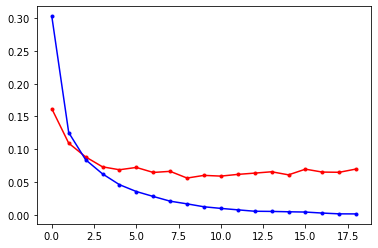

In [7]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))


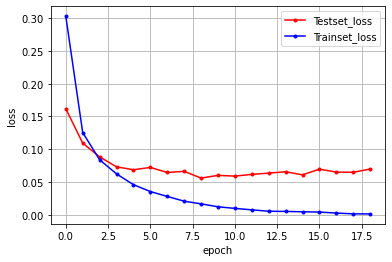

In [10]:
plt.plot(x_len, y_vloss, marker=".", c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()